In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import matplotlib as mpl

# Stock Market Section

In [2]:
# url="https://www.alphavantage.co/query?"
# function="function=TIME_SERIES_DAILY"
# apikey="&apikey=1BRDPG4A7V2DTHYH"
# output="&outputsize=full"
# final_df=pd.DataFrame()

# companies={'FB','GOOGL','AAPL','MSFT','TWTR','UNH','HUM','PFE','JNJ','HCA','DAL','BA','CCL','UAL','STWD'
#          ,'AMZN','WMT','JCP','TGT','M','JPM','C','BRKB','WFC','BAC'}

In [3]:
# for company in companies:
    
#     print(company)
#     symbol="&symbol="+company
#     query_url=url+function+symbol+output+apikey
#     print(query_url)
#     response = requests.get(query_url).json()
#     time.sleep(13)
#     #pprint(response.json())

#     results_dict=response["Time Series (Daily)"]
#     results_df=pd.DataFrame(results_dict)
#     results_df_tram=results_df.transpose()
#     results_df_tram["Company"]=company
#     results_df_tram
#     final_df
#     frames = [final_df, results_df_tram]
#     final_df = pd.concat(frames)
#                     #final_df = pd.concat([final_df,ibm_df_tram], axis=1)
# final_df

In [4]:
# final_reset_df = final_df.reset_index()
# final_reset_df.to_csv('Data/Stocks_20years_updated.csv',index=False)
# final_reset

In [5]:
file = 'Data/Stocks_20years_updated.csv'
stock_data = pd.read_csv(file).rename(columns={'index':'Date',
                                              '1. open':'Open',
                                              '2. high':'High',
                                              '3. low':'Low',
                                              '4. close':'Close',
                                              '5. volume':'Volume'})
stock_data = stock_data[stock_data['Date']>'2020-02-05'].reset_index()
final_stock_df = stock_data.drop(columns='index')


In [6]:
Technology=['FB','GOOGL','AAPL','MSFT','TWTR']
HealthCare=['UNH','HUM','PFE','JNJ','HCA']
Travel=['DAL','BA','CCL','UAL','STWD']
Retail=['AMZN','WMT','JCP','TGT','M']
Finance=['JPM','C','BRKB','WFC','BAC']
final_stock_df['Sector']=''

In [7]:
def f(row):
    if row['Company'] in Technology:
        value = 'Technology'
    elif row['Company'] in HealthCare:
        value = 'Healthcare'
    elif row['Company'] in Travel:
        value = 'Travel'
    elif row['Company'] in Retail:
        value = 'Retail'
    elif row['Company'] in Finance:
        value = 'Finance'
    return value
final_stock_df['Sector'] = final_stock_df.apply(f,axis=1)

In [8]:
final_stock_df

,Date,Open,High,Low,Close,Volume,Company,Sector
0,2020-04-16,23.7600,23.800,22.6300,22.78,55973221,DAL,Travel
1,2020-04-15,24.9100,25.500,23.3100,24.35,87798348,DAL,Travel
2,2020-04-14,23.9899,25.290,23.8300,24.54,58599118,DAL,Travel
3,2020-04-13,24.9800,25.060,22.0800,23.25,75904867,DAL,Travel
4,2020-04-09,25.4000,25.530,23.3500,24.39,90591165,DAL,Travel
...,...,...,...,...,...,...,...,...
1171,2020-02-12,151.8700,152.150,150.9200,151.09,5166684,JNJ,Healthcare
1172,2020-02-11,152.2900,152.380,151.5400,151.99,3715329,JNJ,Healthcare
1173,2020-02-10,151.6800,151.910,150.8911,151.86,4835632,JNJ,Healthcare
1174,2020-02-07,153.3400,153.455,151.5500,151.89,5699606,JNJ,Healthcare


In [9]:
#Stock Weekly price DataFrame
final_stock_df['Date']=pd.to_datetime(final_stock_df['Date'])
final_date= final_stock_df.groupby(['Sector',pd.Grouper(key='Date',freq='W')])['Open','High','Low','Close'].mean()
final_index_df = final_date.reset_index(['Sector']).sort_values('Date',ascending=False)
final_week_df = final_index_df[['Sector','Close']].pivot(columns='Sector',values='Close')
final_week_df.head()

C:\Users\Wei_l\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Sector,Finance,Healthcare,Retail,Technology,Travel
Date,,,,,
2020-02-09,74.6925,197.1010,462.778880,446.6460,109.2300
2020-02-16,74.8900,200.4740,479.382080,454.2144,110.4092
2020-02-23,74.0025,201.8615,479.358485,453.6245,108.4440
2020-03-01,66.5815,179.5344,436.411616,410.1924,94.7904
2020-03-08,62.1680,188.1884,433.673616,405.6072,86.3680


In [10]:
#Stock Daily price DataFrame
final_stock_testing = final_stock_df[['Date','Sector','Close']].groupby(['Sector','Date']).mean().reset_index(['Sector'])
final_day_df = final_stock_testing.pivot(columns='Sector',values='Close')
final_day_df

Sector,Finance,Healthcare,Retail,Technology,Travel
Date,,,,,
2020-02-06,74.8075,198.532,459.87116,446.814,109.988
2020-02-07,74.5775,195.670,465.68660,446.478,108.472
2020-02-10,74.6700,195.276,476.61602,453.586,109.880
2020-02-11,74.9625,197.520,479.99204,451.390,110.456
2020-02-12,75.0100,203.346,482.33914,455.618,111.810
2020-02-13,74.9775,204.060,480.60906,454.454,110.404
2020-02-14,74.8300,202.168,477.35414,456.024,109.496
2020-02-18,73.6200,201.590,481.98256,456.306,109.314
2020-02-19,74.3375,203.816,484.45852,458.406,109.062


Text(0.5, 0, 'Date (Weekly)')

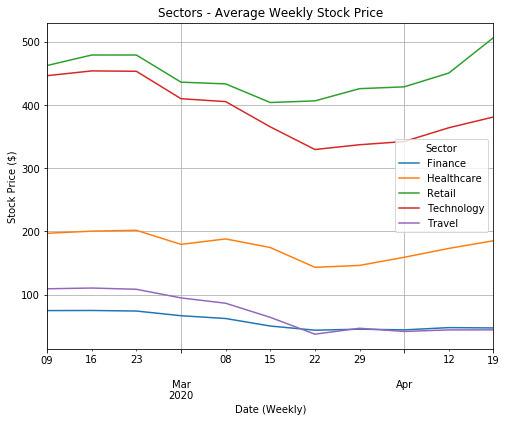

In [11]:
#Stock weekly price chart
ax = final_week_df.plot.line(figsize=(8,6),title='Sectors - Average Weekly Stock Price',grid=True)
ax.set_ylabel('Stock Price ($)')
ax.set_xlabel('Date (Weekly)')

Text(0.5, 0, 'Date (Daily; Nov 2019-Apr 2020)')

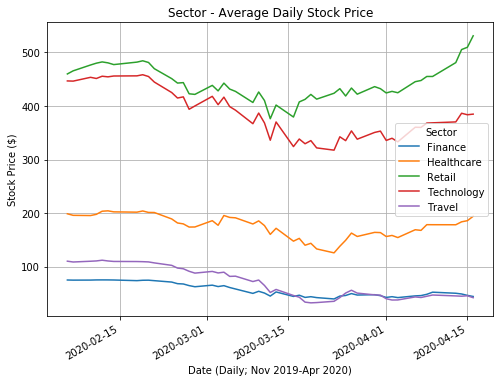

In [12]:
#Stock Daily price chart
ax = final_day_df.plot.line(figsize=(8,6),title='Sector - Average Daily Stock Price',grid=True)
ax.set_ylabel('Stock Price ($)')
ax.set_xlabel('Date (Daily; Nov 2019-Apr 2020)')

In [13]:
#final_index_df.to_csv('Data/Stocks_20years_samples.csv',index=False)


# Coronavirus Section

In [14]:
# Load in csv
corona_df = pd.read_csv("Data/Full_corona_04162020.csv")
Date_sum_df = corona_df.groupby(['date']).sum()

Date_sum_df.head()
Date_sum_df.reset_index().head()


,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200228,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,9.0,9.0,53,0.0,0.0,0.0,0.0,0.0
1,20200229,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.0,18.0,18.0,53,1.0,0.0,0.0,9.0,9.0
2,20200301,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,40.0,40.0,123,3.0,0.0,0.0,12.0,12.0
3,20200302,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,53.0,53.0,53.0,123,3.0,0.0,0.0,13.0,13.0
4,20200303,94.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,100.0,100.0,123,3.0,0.0,6.0,41.0,47.0


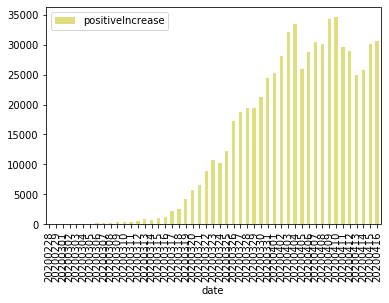

In [15]:
#Graph #1 Positive Cases vs Date YTD
Date_sum_df[['positiveIncrease']].plot.bar(color='y', alpha=0.5, align="center")
plt.rcParams['figure.figsize'] = (100,100)
plt.style.use('ggplot')


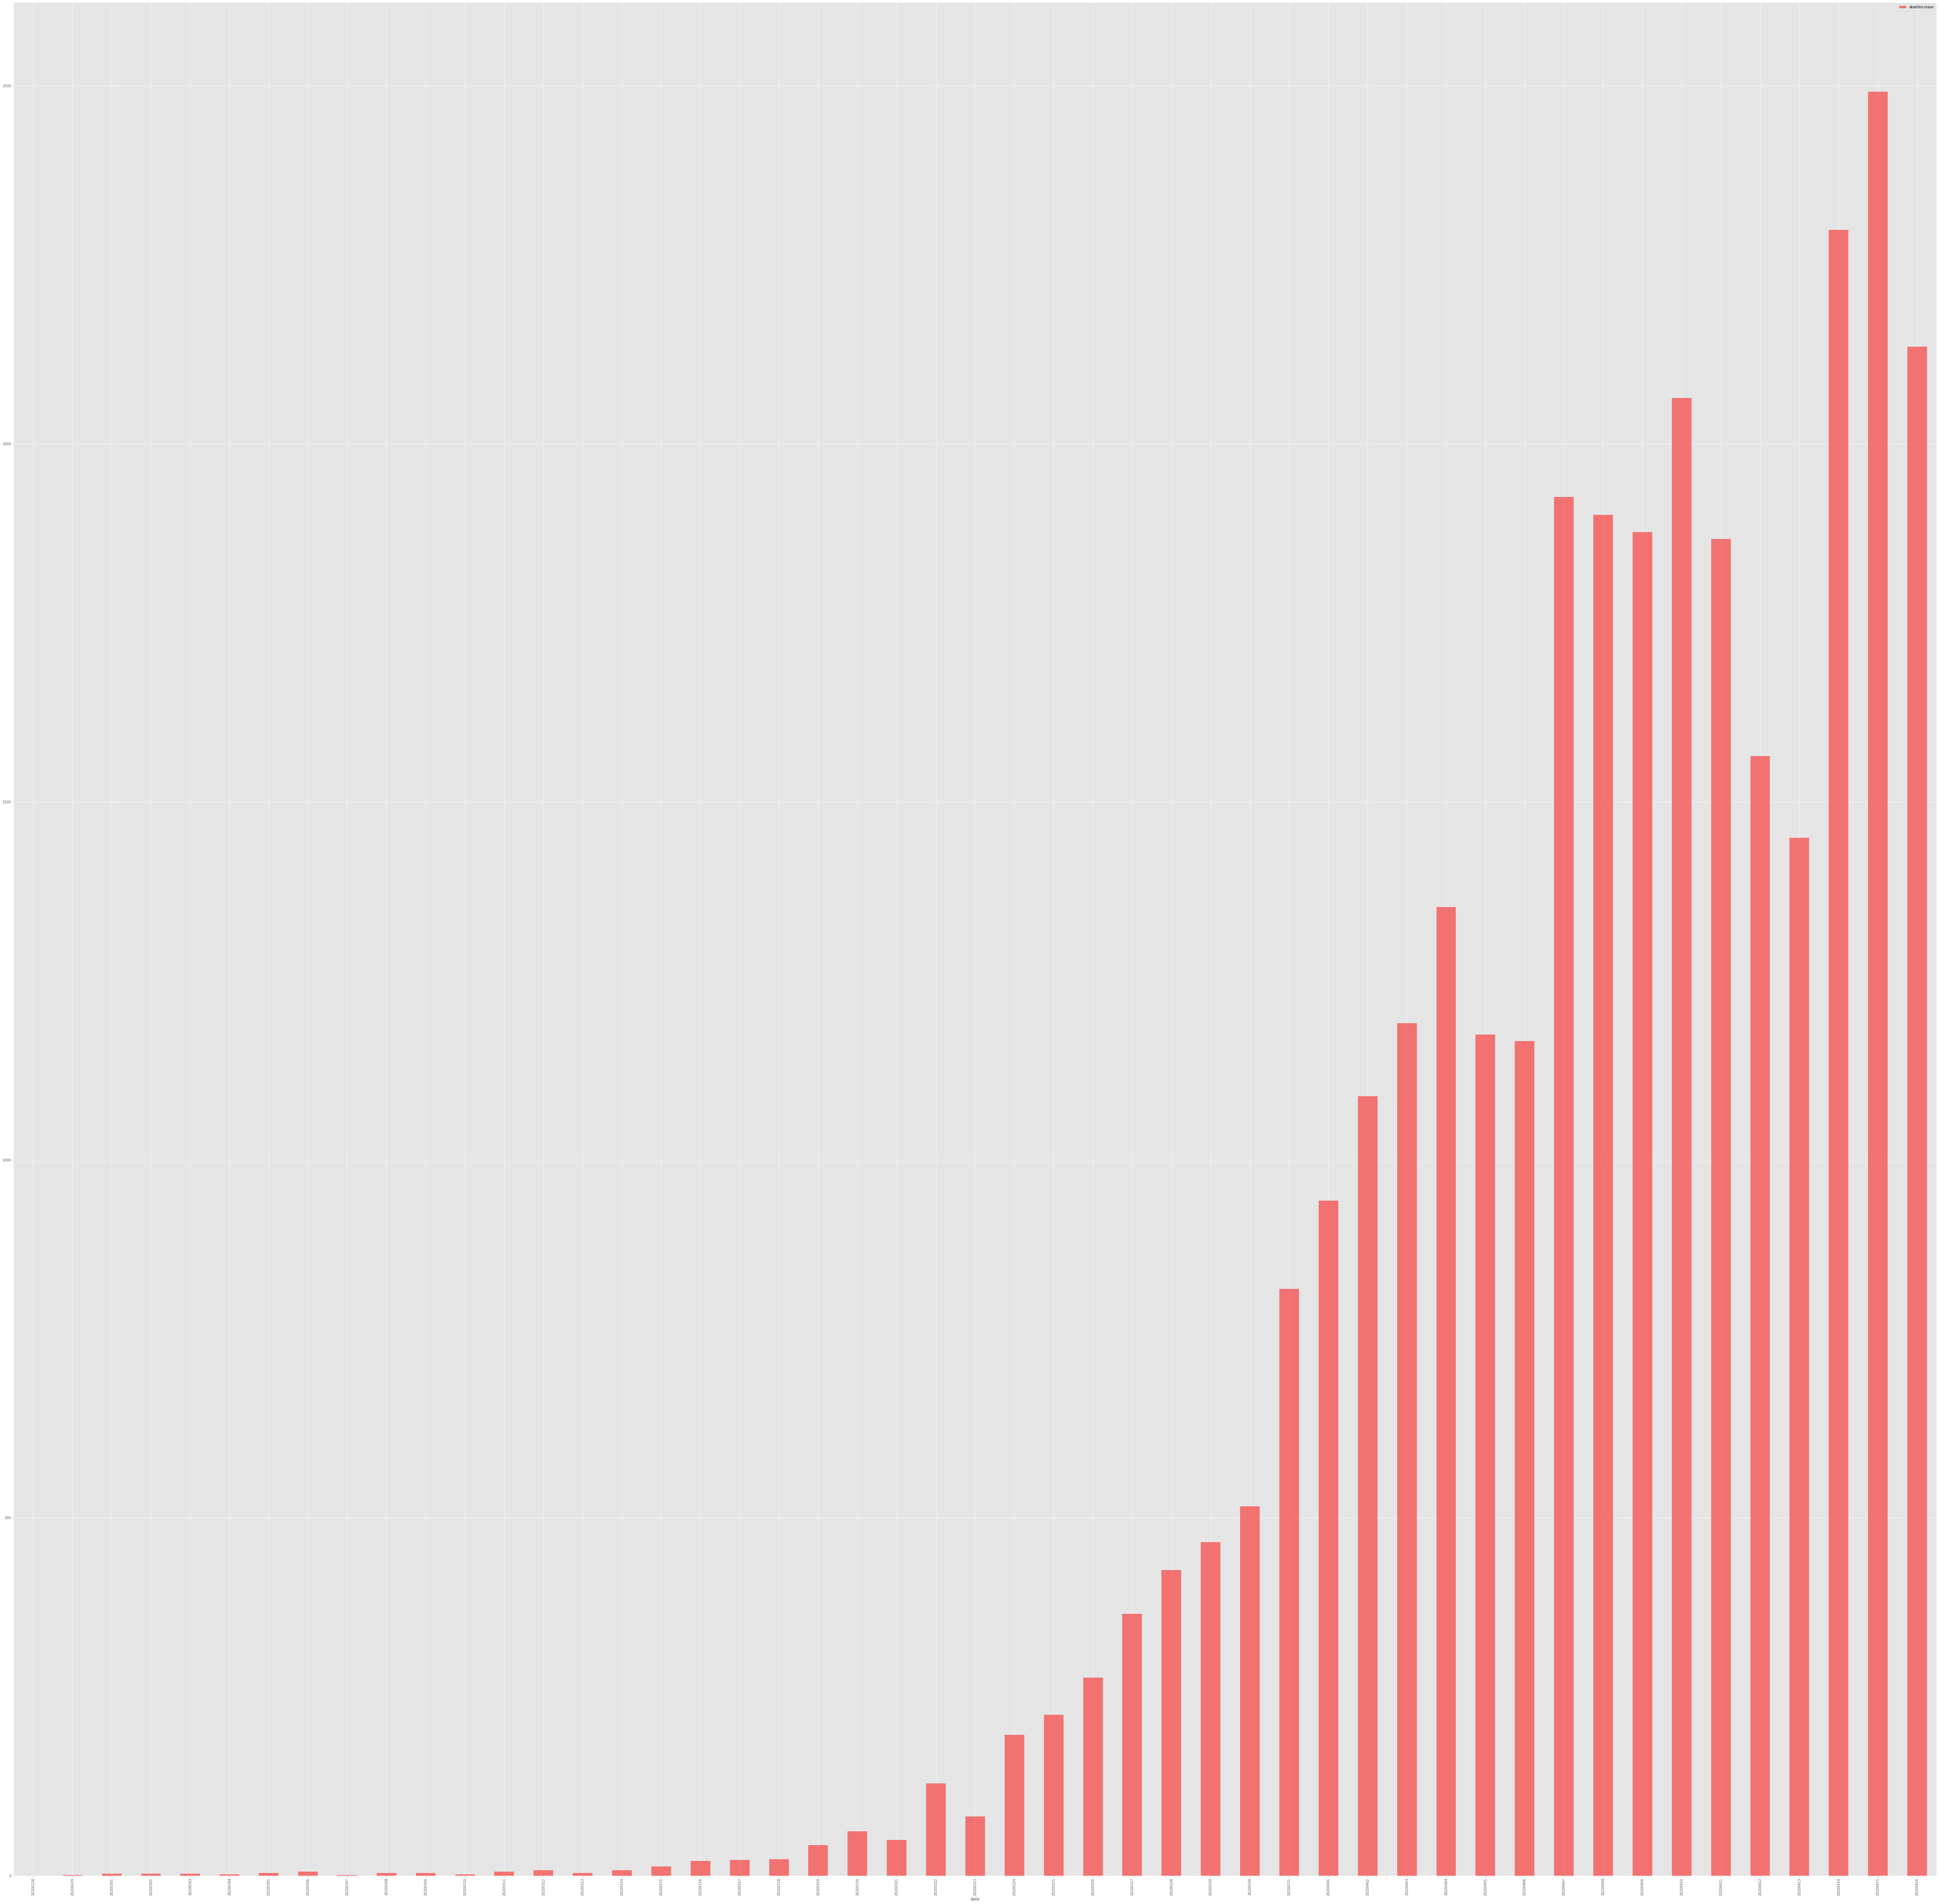

In [16]:
#Graph #2 Positive Cases vs Date YTD
Date_sum_df[['deathIncrease']].plot.bar(color='r', alpha=0.5, align="center")
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('ggplot')

In [17]:
# x_values = corona_df["deathIncrease"]
# y_values = corona_df["positiveIncrease"]
# plt.scatter(x_values,y_values)
# plt.xlabel('Increase in Death')
# plt.ylabel('Increase in Positive cases)')
# plt.show()

# Stock Market & Coronavirus

The r-squared is: 0.45656438089176316
The correlation coefficient between Stock Market and Coronavirus cases is -0.68


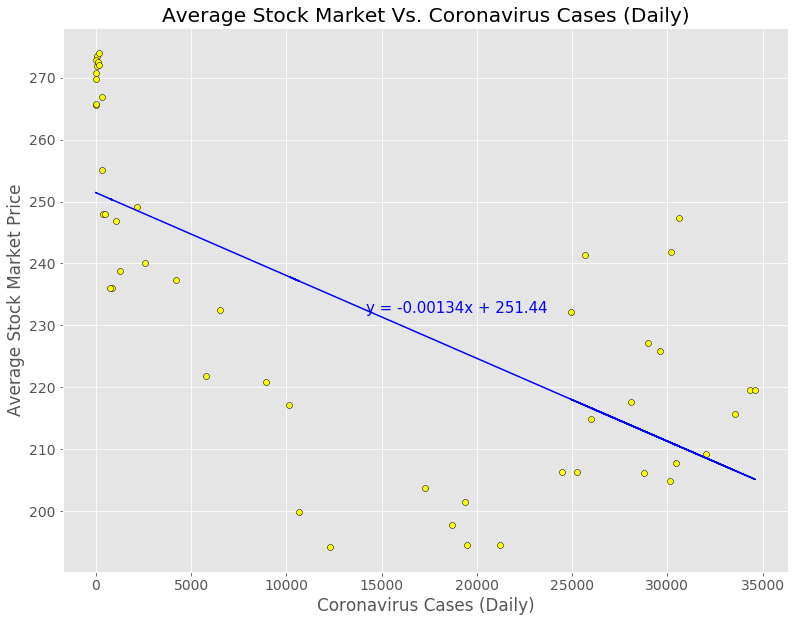

In [21]:
corona_scatter = Date_sum_df[['positiveIncrease']]
stock_scatter = final_stock_df[['Date','Close']].loc[final_stock_df['Date']>'2020-02-05'].groupby(['Date']).mean()

plt.scatter(corona_scatter,stock_scatter,marker="o", facecolors="yellow", edgecolors="black",alpha=1.00)
plt.title('Average Stock Market Vs. Coronavirus Cases (Daily)')
plt.xlabel('Coronavirus Cases (Daily)')
plt.ylabel('Average Stock Market Price')

mpl.rcParams['figure.figsize']=(13,10)
plt.rcParams.update({'font.size': 8})

x_values = corona_scatter['positiveIncrease']
y_values = stock_scatter['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color='blue')
plt.annotate(line_eq,(14200,232),fontsize=15,color='blue')
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between Stock Market and Coronavirus cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],stock_scatter['Close'])[0],2)}")

<Figure size 936x720 with 0 Axes>

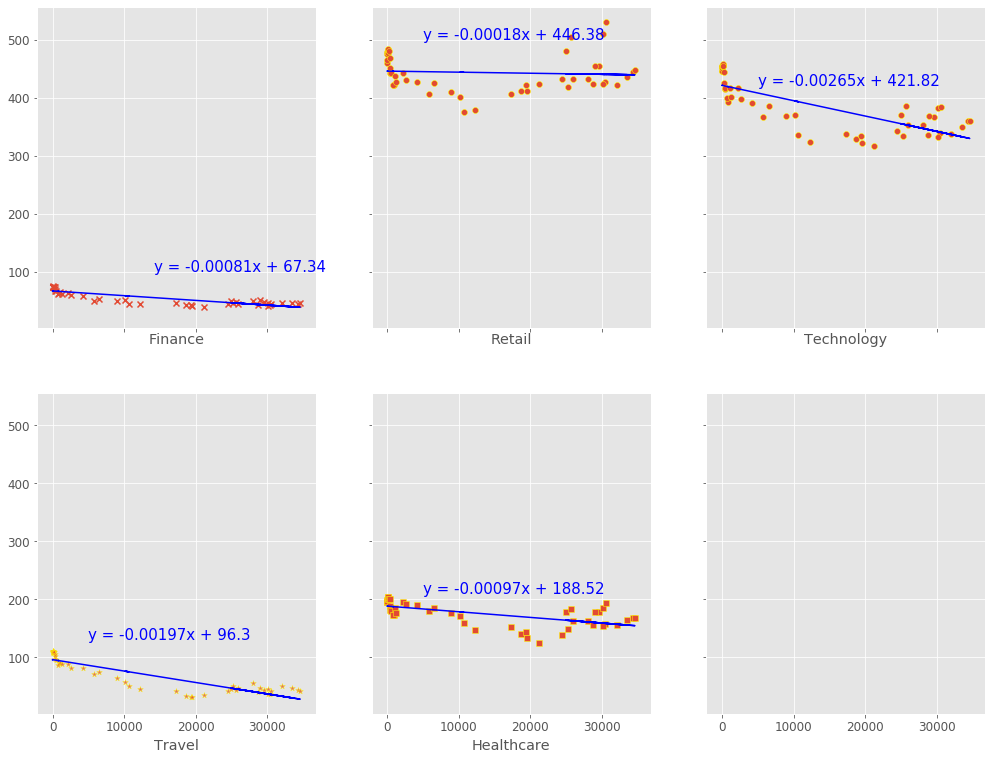

The correlation coefficient between Finance Sector and Coronavirus cases is -0.85
The correlation coefficient between Technology Sector and Coronavirus Cases is -0.76
The correlation coefficient between Travel Sector and Coronavirus Cases is -0.89
The correlation coefficient between Retail Sector and Coronavirus Cases is -0.07
The correlation coefficient between HealthCare Sector and Coronavirus Cases is -0.61


In [25]:
#final_day_df=final_day_df.index.loc[final_day_df.index >'2020-02-05']
scatter_finance = final_day_df[['Finance']]
scatter_healthcare =final_day_df[['Healthcare']]
scatter_retail =final_day_df[['Retail']]
scatter_technology =final_day_df[['Technology']]
scatter_travel =final_day_df[['Travel']]




f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True,figsize=(17,13))
#norm=plt.Normalize(-22,22)

##Finance Subplot Chart
sc = axes[0][0].scatter(corona_scatter,scatter_finance, marker = "x",edgecolors="yellow",alpha=1.00)
axes[0][0].set_xlabel('Finance', labelpad = 5)

finance_x_values = corona_scatter['positiveIncrease']
finance_y_values = scatter_finance['Finance']
(slope, intercept, rvalue, pvalue, stderr) = linregress(finance_x_values, finance_y_values)
regress_values_finance = finance_x_values * slope + intercept
line_eq_finance = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
axes[0][0].plot(finance_x_values,regress_values_finance,"r-",color='blue')
axes[0][0].annotate(line_eq_finance,(14200,100),fontsize=15,color='blue')


##Retail Subplot Chart
axes[0][1].scatter(corona_scatter,scatter_retail, marker = 'o',edgecolors="yellow",alpha=1.00)
axes[0][1].set_xlabel('Retail', labelpad = 5)

retail_x_values = corona_scatter['positiveIncrease']
retail_y_values = scatter_retail['Retail']
(slope, intercept, rvalue, pvalue, stderr) = linregress(retail_x_values, retail_y_values)
regress_values_retail = retail_x_values * slope + intercept
line_eq_retail = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
axes[0][1].plot(retail_x_values,regress_values_retail,"r-",color='blue')
axes[0][1].annotate(line_eq_retail,(5000,500),fontsize=15,color='blue')


##Travel Subplot Chart
axes[1][0].scatter(corona_scatter,scatter_travel, marker = '*',edgecolors="yellow",alpha=0.75)
axes[1][0].set_xlabel('Travel',labelpad = 5)

travel_x_values = corona_scatter['positiveIncrease']
travel_y_values = scatter_travel['Travel']
(slope, intercept, rvalue, pvalue, stderr) = linregress(travel_x_values, travel_y_values)
regress_values_travel = travel_x_values * slope + intercept
line_eq_travel = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
axes[1][0].plot(travel_x_values,regress_values_travel,"r-",color='blue')
axes[1][0].annotate(line_eq_travel,(5000,130),fontsize=15,color='blue')

##HealthCare Subplot Chart
axes[1][1].scatter(corona_scatter,scatter_healthcare, marker = 's',edgecolors="yellow",alpha=1.00)
axes[1][1].set_xlabel('Healthcare',labelpad = 5)

healthcare_x_values = corona_scatter['positiveIncrease']
healthcare_y_values = scatter_healthcare['Healthcare']
(slope, intercept, rvalue, pvalue, stderr) = linregress(healthcare_x_values, healthcare_y_values)
regress_values_healthcare = healthcare_x_values * slope + intercept
line_eq_healthcare = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
axes[1][1].plot(healthcare_x_values,regress_values_healthcare,"r-",color='blue')
axes[1][1].annotate(line_eq_healthcare,(5000,210),fontsize=15,color='blue')



axes[0][2].scatter(corona_scatter,scatter_technology, marker = 'o',edgecolors="yellow",alpha=1.00)
axes[0][2].set_xlabel('Technology', labelpad = 5)

technology_x_values = corona_scatter['positiveIncrease']
technology_y_values = scatter_technology['Technology']
(slope, intercept, rvalue, pvalue, stderr) = linregress(technology_x_values, technology_y_values)
regress_values_technology = technology_x_values * slope + intercept
line_eq_technology = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
axes[0][2].plot(technology_x_values,regress_values_technology,"r-",color='blue')
axes[0][2].annotate(line_eq_technology,(5000,420),fontsize=15,color='blue')


plt.show()
print(f"The correlation coefficient between Finance Sector and Coronavirus cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],scatter_finance['Finance'])[0],2)}")
print(f"The correlation coefficient between Technology Sector and Coronavirus Cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],scatter_technology['Technology'])[0],2)}")
print(f"The correlation coefficient between Travel Sector and Coronavirus Cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],scatter_travel['Travel'])[0],2)}")
print(f"The correlation coefficient between Retail Sector and Coronavirus Cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],scatter_retail['Retail'])[0],2)}")
print(f"The correlation coefficient between HealthCare Sector and Coronavirus Cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],scatter_healthcare['Healthcare'])[0],2)}")
